In [74]:
from goodreads import client
import numpy as np
gc = client.GoodreadsClient(CLIENT_ID, CLIENT_SECRET)

In [75]:
like_list = ['The Brothers Karamazov','A Portrait of the Artist as a Young Man', 'Chronicles: Volume One']

In [76]:
like_ids = []
similar_ids = []
for like in like_list:
    book = gc.search_books(like)[0] #get first result from API. it corrects for possible spelling errors
    like_ids.append(book.gid)
    
    similar_book_list = book.similar_books #turn a list of GoodreadsBook objects into ids
    
    new_list = []
    for j in similar_book_list:
        new_list.append(j.gid)
    similar_ids.append(new_list)

In [77]:
zipObj = zip(like_ids , similar_ids)
book_dict = dict(zipObj)
#book_dict

In [78]:
#trying to abstract the previous problem to get solution more quickly
import random
ids = []
for like in like_list:
    s_list = random.sample(range(100), 10)
    
    new_list = []
    for j in range(len(s_list)):
        new_list.append(s_list[j])
    ids.append(new_list)
ids        

[[59, 42, 85, 68, 21, 34, 49, 55, 60, 39],
 [80, 70, 1, 3, 34, 86, 53, 79, 59, 97],
 [30, 58, 92, 7, 71, 0, 23, 62, 87, 84]]

In [79]:
import plotly.graph_objects as go
import networkx as nx
from itertools import product

H = nx.Graph()

x = list(map(int, like_ids)) 

for k in range(len(like_list)):
    H.add_edges_from(list(product([x[k]],list(map(int, similar_ids[k])))))


#G.add_edges_from(list(product([x[0]],y0)))

for t in range(len(like_list)):
    subbooks = list(map(int, similar_ids[t]))

    subsubbooks = gc.book(subbooks[t]).similar_books

    for i in range(len(subsubbooks)):
        subsubbooks[i] = subsubbooks[i].gid
        
    H.add_edges_from(list(product(subbooks,list(map(int, subsubbooks)))))

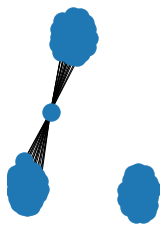

In [124]:
import matplotlib.pyplot as plt
plt.subplot(121)
nx.draw(H, with_labels=False, font_weight='bold')

In [112]:
like_ids

['4934', '7588', '14318']

In [113]:
nx.clustering(H)

{4934: 0.1111111111111111,
 18114322: 0.1111111111111111,
 226378: 0.1111111111111111,
 15823480: 0.5151515151515151,
 656: 0.1111111111111111,
 117833: 0.1111111111111111,
 28381: 0.1111111111111111,
 18386: 0.1111111111111111,
 17690: 0.1111111111111111,
 19117: 0.1111111111111111,
 49552: 0.1111111111111111,
 11989: 0.1111111111111111,
 320: 0.1111111111111111,
 3836: 0.1111111111111111,
 485894: 0.1111111111111111,
 97390: 0.1111111111111111,
 254308: 0.1111111111111111,
 2175: 0.14603174603174604,
 42641: 0.1111111111111111,
 7588: 0.49019607843137253,
 59716: 0.49019607843137253,
 14942: 0.49019607843137253,
 10975: 0.49019607843137253,
 4900: 0.6413793103448275,
 17716: 0.6413793103448275,
 77013: 0.49019607843137253,
 2794: 0.49019607843137253,
 34080: 0.6413793103448275,
 12749: 0.49019607843137253,
 32071: 0.49019607843137253,
 3876: 0.49019607843137253,
 595038: 0.49019607843137253,
 7628: 0.6413793103448275,
 333314: 0.49019607843137253,
 45195: 0.49019607843137253,
 7805: 

In [126]:
gc.book(101636)

Room Full of Mirrors: A Biography of Jimi Hendrix